## Predict Earthquake Magnitudes Greater Than or Equal to Median Magnitude

This notebook will import data and create a neural network to predict whether the magnitude of an earthquake is below or above median magnitude (5.4) for the entire data set, approximately 75,000 records. 

- Import and Processing the Data
- Building and Training our Neural Network
- Visualizing Loss and Accuracy
- Predictiions


# Import and Processing the Data

In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from pandas.api.types import CategoricalDtype

In [2]:
# Read in csv file as dataframe
df = pd.read_csv('earthquakes_rounded_latlong_full_database.csv')

In [3]:
# Categorize month column
mo_cat = CategoricalDtype(categories=[str(i) for i in range(1,13)], ordered=True)
df.month.astype(mo_cat)
df.columns
print(mo_cat)

category


In [4]:
# Print dataframe
# mag_avg - 0 = below median magnitude, 1 = equal to greater than median magnitude
# Note: latitudes and longitudes have been rounded to nearest ten
df

,month,latitude,longitude,depth,mag,mag_avg
0,1,-60,0,20,6.3,1
1,1,40,90,20,5.7,1
2,1,10,40,20,6.1,1
3,1,50,30,40,5.4,1
4,1,10,100,20,5.6,1
...,...,...,...,...,...,...
75844,1,-10,170,10,5.8,1
75845,1,10,100,50,5.6,1
75846,1,20,-80,10,5.4,1
75847,1,-10,170,40,5.1,0


The dataset that we have now is in what we call a pandas dataframe. To convert it to an array, simply access its values:

In [5]:
dataset = df.values
dataset

array([[  1. , -60. ,   0. ,  20. ,   6.3,   1. ],
       [  1. ,  40. ,  90. ,  20. ,   5.7,   1. ],
       [  1. ,  10. ,  40. ,  20. ,   6.1,   1. ],
       ...,
       [  1. ,  20. , -80. ,  10. ,   5.4,   1. ],
       [  1. , -10. , 170. ,  40. ,   5.1,   0. ],
       [  1. , -60. , -30. ,  90. ,   5.1,   0. ]])

Split the dataset into our input features and the label we wish to predict.

In [6]:
X = dataset[:,0:5]
Y = dataset[:,5]

Set aside some parts of the dataset for a validation set and a test set. Use the function train_test_split from scikit-learn.

In [7]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)

In [8]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [9]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

# X_train (5 input features, 70% of full dataset)
# X_val (5 input features, 15% of full dataset)
# X_test (5 input features, 15% of full dataset)
# Y_train (1 label, 70% of full dataset)
# Y_val (1 label, 15% of full dataset)
# Y_test (1 label, 15% of full dataset)

(53094, 5) (11377, 5) (11378, 5) (53094,) (11377,) (11378,)


In [10]:
# Print features array
X_val

array([[  1. ,  30. , 140. ,  30. ,   5.1],
       [  3. , -10. , 150. , 120. ,   5.5],
       [ 11. ,  10. , -50. ,  10. ,   5. ],
       ...,
       [  3. , -10. , 120. , 540. ,   5.2],
       [  3. ,  40. , 140. ,  40. ,   5.1],
       [  7. , -10. , 170. ,  30. ,   5.4]])

# Build and Train First Neural Network Model

Use Keras to build model architecture. 

Use the Sequential model. The neural network has three layers:

- Hidden layer 1: 32 neurons, ReLU activation
- Hidden layer 2: 32 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation

In [11]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(5,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

Next configure the model by
- Optimization (stochastic gradient descent)
- Loss function (for binary classification use binary cross entropy)
- Metrics (loss and accuracy)

In [12]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Fit the parameters to the data. 
- training data (X_train and Y_train)
- specify the size of our mini-batch 
- specify how long to train (epochs)
- use validation data to determine model performance

In [13]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
1660/1660 [==============================] - 4s 2ms/step - loss: 0.7203 - accuracy: 0.5841 - val_loss: 0.6861 - val_accuracy: 0.5786
Epoch 2/100
1660/1660 [==============================] - 4s 2ms/step - loss: 0.6733 - accuracy: 0.5929 - val_loss: 0.6727 - val_accuracy: 0.5914
Epoch 3/100
1660/1660 [==============================] - 4s 2ms/step - loss: 0.6707 - accuracy: 0.5965 - val_loss: 0.6740 - val_accuracy: 0.5937
Epoch 4/100
1660/1660 [==============================] - 3s 2ms/step - loss: 0.6697 - accuracy: 0.5974 - val_loss: 0.6713 - val_accuracy: 0.5913
Epoch 5/100
1660/1660 [==============================] - 3s 2ms/step - loss: 0.6688 - accuracy: 0.5985 - val_loss: 0.6716 - val_accuracy: 0.5955
Epoch 6/100
1660/1660 [==============================] - 4s 2ms/step - loss: 0.6680 - accuracy: 0.6002 - val_loss: 0.6714 - val_accuracy: 0.5930
Epoch 7/100
1660/1660 [==============================] - 4s 2ms/step - loss: 0.6675 - accuracy: 0.6004 - val_loss: 0.6733 - val_ac

1660/1660 [==============================] - 4s 2ms/step - loss: 0.5512 - accuracy: 0.7291 - val_loss: 0.5358 - val_accuracy: 0.7351
Epoch 58/100
1660/1660 [==============================] - 4s 2ms/step - loss: 0.5532 - accuracy: 0.7272 - val_loss: 0.6552 - val_accuracy: 0.6993
Epoch 59/100
1660/1660 [==============================] - 4s 2ms/step - loss: 0.5508 - accuracy: 0.7266 - val_loss: 1.0061 - val_accuracy: 0.4852
Epoch 60/100
1660/1660 [==============================] - 3s 2ms/step - loss: 0.5462 - accuracy: 0.7299 - val_loss: 0.5018 - val_accuracy: 0.7684
Epoch 61/100
1660/1660 [==============================] - 4s 2ms/step - loss: 0.5456 - accuracy: 0.7309 - val_loss: 0.4926 - val_accuracy: 0.7891
Epoch 62/100
1660/1660 [==============================] - 4s 2ms/step - loss: 0.5459 - accuracy: 0.7308 - val_loss: 0.5505 - val_accuracy: 0.7205
Epoch 63/100
1660/1660 [==============================] - 4s 2ms/step - loss: 0.5469 - accuracy: 0.7300 - val_loss: 0.6118 - val_accuracy

Evaluate data in the test set:

In [14]:
model.evaluate(X_test, Y_test)[1]

356/356 [==============================] - 1s 1ms/step - loss: 0.8421 - accuracy: 0.6464


0.6464229226112366

# Visualizing Loss and Accuracy

Plot training and validation loss

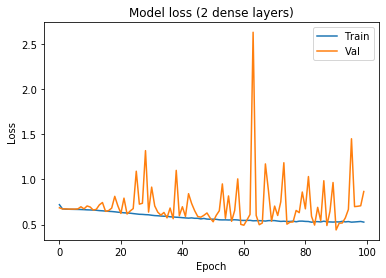

In [15]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss (2 dense layers)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Plot training and validation accuracy

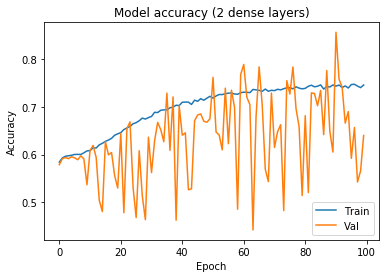

In [16]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy (2 dense layers)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [17]:
# Print model performance using validation data
[test_loss, test_acc] = model.evaluate(X_val, Y_val)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

356/356 [==============================] - 1s 2ms/step - loss: 0.8662 - accuracy: 0.6402
Evaluation result on Test Data : Loss = 0.8661602139472961, accuracy = 0.6401512026786804


# Add Additional Hidden Layers to the Neural Network

In [18]:
model_2 = Sequential([
    Dense(250, activation='relu', input_shape=(5,)),
    Dense(250, activation='relu'),
    Dense(250, activation='relu'),
    Dense(250, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
1660/1660 [==============================] - 7s 4ms/step - loss: 0.6989 - accuracy: 0.5858 - val_loss: 0.6715 - val_accuracy: 0.5930
Epoch 2/100
1660/1660 [==============================] - 7s 4ms/step - loss: 0.6657 - accuracy: 0.6044 - val_loss: 0.6480 - val_accuracy: 0.6254
Epoch 3/100
1660/1660 [==============================] - 7s 4ms/step - loss: 0.6090 - accuracy: 0.6586 - val_loss: 0.4965 - val_accuracy: 0.7549
Epoch 4/100
1660/1660 [==============================] - 7s 4ms/step - loss: 0.4612 - accuracy: 0.7640 - val_loss: 0.3434 - val_accuracy: 0.8469
Epoch 5/100
1660/1660 [==============================] - 7s 4ms/step - loss: 0.2725 - accuracy: 0.8815 - val_loss: 0.2568 - val_accuracy: 0.8717
Epoch 6/100
1660/1660 [==============================] - 7s 4ms/step - loss: 0.2058 - accuracy: 0.9142 - val_loss: 0.1544 - val_accuracy: 0.9349
Epoch 7/100
1660/1660 [==============================] - 7s 4ms/step - loss: 0.1975 - accuracy: 0.9177 - val_loss: 0.1581 - val_ac

1660/1660 [==============================] - 2s 1ms/step - loss: 0.0737 - accuracy: 0.9724 - val_loss: 0.0926 - val_accuracy: 0.9496
Epoch 58/100
1660/1660 [==============================] - 2s 1ms/step - loss: 0.0814 - accuracy: 0.9696 - val_loss: 0.0599 - val_accuracy: 0.9809
Epoch 59/100
1660/1660 [==============================] - 2s 1ms/step - loss: 0.0686 - accuracy: 0.9747 - val_loss: 0.0584 - val_accuracy: 0.9629
Epoch 60/100
1660/1660 [==============================] - 2s 1ms/step - loss: 0.0590 - accuracy: 0.9788 - val_loss: 0.0546 - val_accuracy: 0.9756
Epoch 61/100
1660/1660 [==============================] - 3s 2ms/step - loss: 0.0662 - accuracy: 0.9759 - val_loss: 0.0283 - val_accuracy: 0.9979
Epoch 62/100
1660/1660 [==============================] - 2s 1ms/step - loss: 0.0681 - accuracy: 0.9764 - val_loss: 0.2582 - val_accuracy: 0.9144
Epoch 63/100
1660/1660 [==============================] - 2s 1ms/step - loss: 0.0790 - accuracy: 0.9737 - val_loss: 0.0346 - val_accuracy

Plot training and validation loss and accuracy.

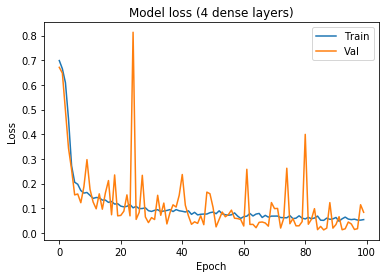

In [19]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss (4 dense layers)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

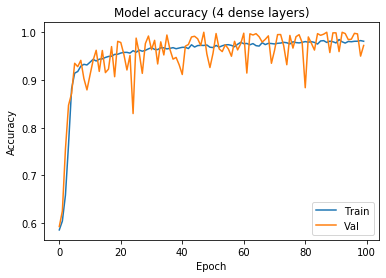

In [20]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy (4 dense layers)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [21]:
# Print model performance using validation data
[test_loss, test_acc] = model_2.evaluate(X_val, Y_val)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

356/356 [==============================] - 0s 664us/step - loss: 0.0838 - accuracy: 0.9722
Evaluation result on Test Data : Loss = 0.08383478969335556, accuracy = 0.9722246527671814


Save the model

In [22]:
model_2.save('ml_earthquake_pred_250.h5')

Count the number of earthquakes that are equal to or greater than median magnitude i.e Y_val = 1

In [23]:
np.set_printoptions(threshold=sys.maxsize)
# print(Y_val)
idx_list=[]
count = 0
for idx, val in enumerate(Y_val):
    if val>0:
        idx_list.append(idx)
        count = count + 1
idx_list
count

4638

Count the number of predicted earthquakes which are below (count_0) and equal to or greater than (count_1) median magnitude.

In [24]:
 # Grab just one data point to test with
count_0 = 0
count_1 = 0
for i in idx_list:
    test = np.expand_dims(X_val[i], axis=0)
    test.shape
    print(model_2.predict_classes(test))
    if model_2.predict_classes(test) > 0:
        count_1 = count_1 + 1
    else:
        count_0 = count_0 + 1
        
count_0
count_1

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[0]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[0]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[0]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[0]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[0]]
[[1]]


[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[0]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[0]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[0]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[0]]
[[1]]
[[1]]
[[1]]
[[0]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[0]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]

[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[0]]
[[1]]
[[1]]
[[0]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[0]]
[[1]]
[[0]]
[[0]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[0]]
[[1]]
[[0]]
[[1]]
[[1]]
[[0]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[0]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[0]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[0]]
[[1]]
[[0]]
[[0]]
[[1]]
[[1]]
[[0]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[0]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[0]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]

[[0]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[0]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[0]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[0]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[0]]
[[1]]
[[1]]
[[0]]
[[1]]
[[1]]
[[0]]
[[1]]
[[1]]
[[1]]
[[0]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[0]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[0]]
[[1]]
[[0]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[0]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]

4325

In [25]:
# Print the model predicted results accuracy
print(count_0, count_1)
print("Prediction Accuracy: ", (count_1/count)*100,"%")

313 4325
Prediction Accuracy:  93.2514014661492 %


In [26]:
# Convert the prediction results and features to a dataframe.  
df_x = pd.DataFrame(X_val)
df_y = pd.DataFrame(Y_val)

frames = [df_x, df_y]


df = pd.concat([df_x,df_y], axis=1)


In [27]:
# Export dataframe to a csv to plot results in Tableau
df.to_csv('ml_earthquake_pred_250.csv',index=False)